<a href="https://colab.research.google.com/github/khaiprograms/MLRepo/blob/main/Week09_Lab_Student_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Week 09 Lab: Bagging, Boosting and Tuning

#### 9.1 Dart Data: Simple Exploratory Data Analysis (EDA)

The data contains the location where darts land on a dart board. It comprises of the X-Y coordinates of where the dart landed, and who threw the dart. The X-variables are the coordinates where the dart landed and the predictive y variable is the person that threw the dart. Hence we are trying to predict who threw the dart given the location where the dart landed.

In [1]:
# loading of libraries.

import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt

In [3]:
# loading of data into pandas dataframes.

train_dataset_url = 'darts-train.csv'
test_dataset_url = 'darts-test.csv'

train_data = pd.read_csv(train_dataset_url)
test_data = pd.read_csv(test_dataset_url)

print(train_data.head())
print(len(train_data))
print(len(test_data))

    ID    XCoord    YCoord Competitor
0  111  0.943354 -0.184819        Bob
1   92  0.121557 -0.927656        Bob
2   20  0.818485  0.375437        Bob
3   75  0.867462 -0.159851        Sue
4   10 -0.817321 -0.373419       Kate
150
37


Check the number of unique competitors.

In [7]:
# TODO: check the number of unqiue competitors.

num_unique_competitors = train_data['Competitor'].nunique()
unique_competitors = train_data['Competitor'].unique()
print(unique_competitors)
print(num_unique_competitors)

['Bob' 'Sue' 'Kate' 'Mark']
4


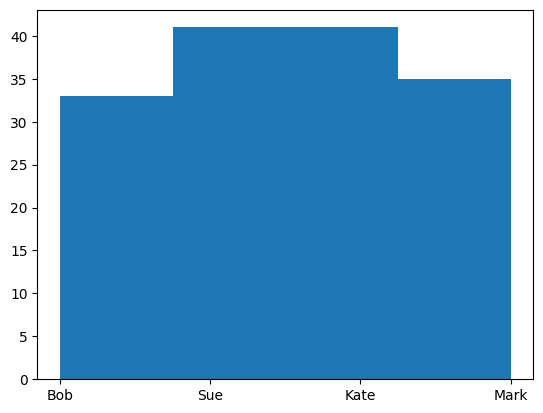

In [8]:
# plot a simple histogram of the competitors.
plt.hist(train_data['Competitor'], bins=train_data['Competitor'].nunique())
plt.show()

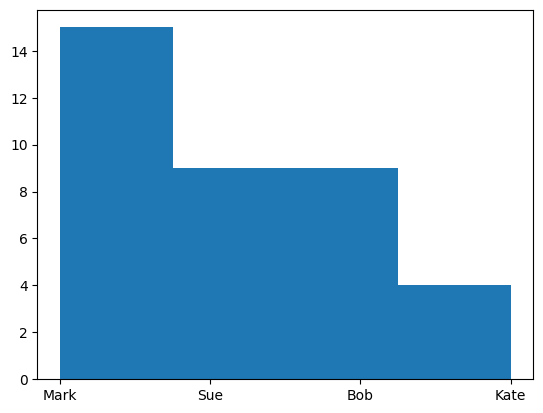

In [9]:
# TODO: plot a simple histogram of the competitors in the test dataset.

plt.hist(test_data['Competitor'], bins=test_data['Competitor'].nunique())
plt.show()

Unfortunately we realize that the test data is not very balanced. That may not result in a good accuracy gauge when we are accessing if the model is a good fit or not. In this lab, what we will do is to combine both the train and the test set together, followed by splitting them in a stratified manner.


Next we will carry out label encoding of the final column "Competitor". We do this by concatenating the dataframes and carry out label encoding of the column together.

In [10]:
full_data = pd.concat([train_data, test_data])

le = preprocessing.LabelEncoder()
le.fit(full_data['Competitor'])
full_data['Competitor'] = le.transform(full_data['Competitor'])

In [11]:
print(full_data.head())

    ID    XCoord    YCoord  Competitor
0  111  0.943354 -0.184819           0
1   92  0.121557 -0.927656           0
2   20  0.818485  0.375437           0
3   75  0.867462 -0.159851           3
4   10 -0.817321 -0.373419           1


In [12]:
le.classes_

array(['Bob', 'Kate', 'Mark', 'Sue'], dtype=object)

Now we check if any of the columns has NULL values.

In [14]:
# TODO: check to see if any of the columns contain NULL values.
null_values = full_data.isnull().any()
print(null_values)

ID            False
XCoord        False
YCoord        False
Competitor    False
dtype: bool


In [15]:
full_data.head()

,ID,XCoord,YCoord,Competitor
0,111,0.943354,-0.184819,0
1,92,0.121557,-0.927656,0
2,20,0.818485,0.375437,0
3,75,0.867462,-0.159851,3
4,10,-0.817321,-0.373419,1


Use train test split to carry out a stratified split, with test size of 25% and random_state=5

In [17]:
# TODO: split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X = full_data[["XCoord", "YCoord"]]
y = full_data["Competitor"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

In [18]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(len(X_train))
X_train.head()


140


,XCoord,YCoord
0,-0.487382,0.686439
1,-0.675733,0.726966
2,-0.229440,-0.821659
3,-0.138605,0.819174
4,-0.101968,0.093819


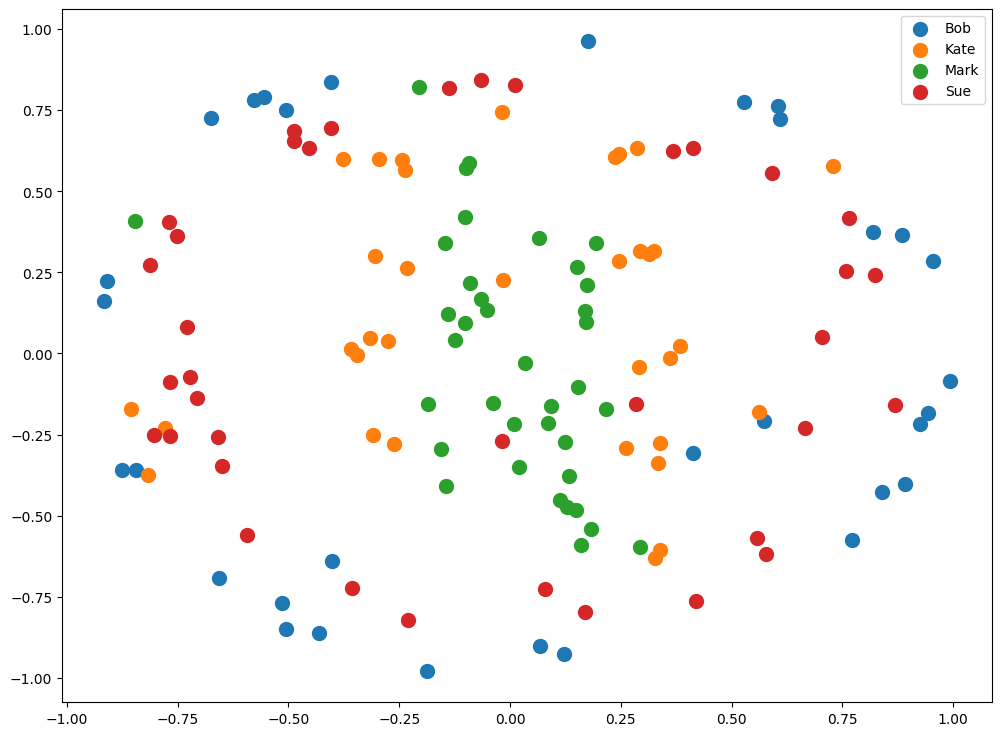

In [19]:
plt.figure(figsize=(12,9))

for i in range(len(le.classes_)):
  t_indices = list(np.where(y_train == i)[0])
  x_values = X_train.loc[t_indices, ["XCoord"]]
  y_values = X_train.loc[t_indices, ["YCoord"]]

  plt.scatter(x=x_values, y=y_values, s=100)

plt.legend(le.classes_)
plt.show()

#### 9.2 Training baseline models

##### Decision Trees

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

Train a baseline decision tree model and find the accuracy score, and balanced accuracy score. The max_depth can be set as 3.

Save the values as
*   accuracy_baseline_dt
*   balanced_accuracy_baseline_dt

In [23]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=5)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy_baseline_dt = accuracy_score(y_test, y_pred)
balanced_accuracy_baseline_dt = balanced_accuracy_score(y_test, y_pred)

print(accuracy_baseline_dt)
print(balanced_accuracy_baseline_dt)

0.46808510638297873
0.4300699300699301


##### Random Forests

Train a baseline random forest model and find the accuracy score, and balanced accuracy score. The max_depth can be set as 3, the number of estimators to be 100, bootstrap to be True oob_score to be True and random state to be 5.

Save the values as
*   accuracy_baseline_rf
*   balanced_accuracy_baseline_rf

In [25]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    bootstrap=True,
    oob_score=True,
    random_state=5
)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy_baseline_rf = accuracy_score(y_test, y_pred)
balanced_accuracy_baseline_rf = balanced_accuracy_score(y_test, y_pred)

print(accuracy_baseline_rf)
print(balanced_accuracy_baseline_rf)

0.6170212765957447
0.5867132867132867


##### XG Classifier

Train a baseline XG classifier model and find the accuracy score, and balanced accuracy score. The max_depth can be set as 3, the number of estimators to be 100, bootstrap to be True and random state to be 5.

Save the values as
*   accuracy_baseline_xg
*   balanced_accuracy_baseline_xg

In [26]:
xg_classifier = XGBClassifier(
    max_depth=3,
    n_estimators=100,
    use_label_encoder=False,  # To avoid warning for deprecation
    bootstrap=True,
    random_state=5
)

xg_classifier.fit(X_train, y_train)

y_pred_xg = xg_classifier.predict(X_test)

accuracy_baseline_xg = accuracy_score(y_test, y_pred_xg)
balanced_accuracy_baseline_xg = balanced_accuracy_score(y_test, y_pred_xg)

print(accuracy_baseline_xg)
print(balanced_accuracy_baseline_xg)

0.6595744680851063
0.654020979020979


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:25:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "bootstrap" } are not used.

  warnings.warn(smsg, UserWarning)


##### Support Vector Classifier

Train a baseline SVC model and find the accuracy score, and balanced accuracy score. The gamma can be set to auto and random state to be 5.

Save the values as
*   accuracy_baseline_svc
*   balanced_accuracy_baseline_svc

In [27]:
svc = SVC(gamma='auto', random_state=5)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy_baseline_svc = accuracy_score(y_test, y_pred)
balanced_accuracy_baseline_svc = balanced_accuracy_score(y_test, y_pred)

print(accuracy_baseline_svc)
print(balanced_accuracy_baseline_svc)

0.3404255319148936
0.32622377622377624


This next section prints out the accuracy as a table.

In [28]:
header_list = []
header_list.append(" ")
header_list.append("Decision Tree")
header_list.append("Random Forest")
header_list.append("XG Boost")
header_list.append("SVC")

accuracy_list = []
accuracy_list.append("accuracy baseline")
accuracy_list.append(accuracy_baseline_dt)
accuracy_list.append(accuracy_baseline_rf)
accuracy_list.append(accuracy_baseline_xg)
accuracy_list.append(accuracy_baseline_svc)

balanced_accuracy_list = []
balanced_accuracy_list.append("balanced accuracy baseline")
balanced_accuracy_list.append(balanced_accuracy_baseline_dt)
balanced_accuracy_list.append(balanced_accuracy_baseline_rf)
balanced_accuracy_list.append(balanced_accuracy_baseline_xg)
balanced_accuracy_list.append(balanced_accuracy_baseline_svc)

full_list = []
full_list.append(header_list)
full_list.append(accuracy_list)
full_list.append(balanced_accuracy_list)

df = pd.DataFrame(full_list)
df

,0,1,2,3,4
0,,Decision Tree,Random Forest,XG Boost,SVC
1,accuracy baseline,0.468085,0.617021,0.659574,0.340426
2,balanced accuracy baseline,0.43007,0.586713,0.654021,0.326224


#### 9.3 Simple Feature Engineering

The accuracy that we see above are still relatively low. However it is a common technique to engineer features and some of these engineered features can gastly improve the accuracy scores.

One of the features we will engineer will be the distance from the centre (origin) of the dart board.

Create an additional feature, known as distance. This is the distance from the centre of the dart board. Set this feature to be a new column Distance in full_data dataframe. After that we split into the train and test data again.

In [29]:
full_data['Distance'] = (full_data['XCoord']**2 + full_data['YCoord']**2)**0.5

In [31]:
X = full_data[['XCoord', 'YCoord', 'Distance']]
y = full_data['Competitor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

Redo the analysis with Decision Trees, Random Forest, XGBoost and SVC.

Save the Decision Tree accuracies as accuracy_dt and balanced_accuracy_dt.

Save the Random Forest accuracies as accuracy_rf and balanced_accuracy_rf.

Save the XGBoost accuracies as accuracy_xg and balanced_accuracy_xg.

Save the SVC accuracies as accuracy_svc and balanced_accuracy_svc.

In [32]:
dt = DecisionTreeClassifier(max_depth=3, random_state=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
balanced_accuracy_dt = balanced_accuracy_score(y_test, y_pred_dt)

print(accuracy_dt)
print(balanced_accuracy_dt)

0.723404255319149
0.7127622377622378


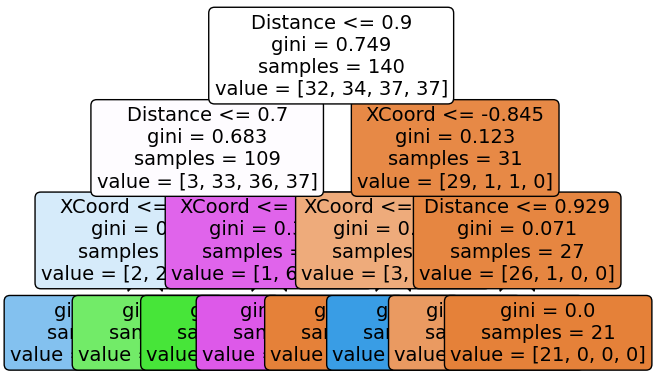

In [34]:
from sklearn.tree import plot_tree
a = plot_tree(dt, feature_names=['XCoord', 'YCoord', 'Distance'], filled=True,rounded=True,fontsize=14)

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, bootstrap=True, oob_score=True, random_state=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
balanced_accuracy_rf = balanced_accuracy_score(y_test, y_pred_rf)

print(accuracy_rf)
print(balanced_accuracy_rf)

0.7659574468085106
0.7687062937062937


The random forest is created through the bootstrap algorithm. When OOB is enabled, it means that you will be using samples not selected via the bootstrap algorithm to calculate the accuracy score.

These are the number of estimators. We can in fact use individual estimators to test if you want.

In [35]:
len(rf.estimators_)

100

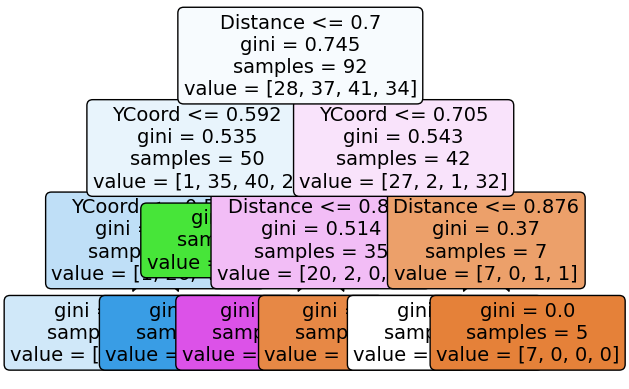

In [36]:
a = plot_tree(rf.estimators_[0], feature_names=['XCoord', 'YCoord', 'Distance'], filled=True,rounded=True,fontsize=14)

In [37]:
xg = XGBClassifier(max_depth=3, n_estimators=100, use_label_encoder=False, random_state=5)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
balanced_accuracy_xg = balanced_accuracy_score(y_test, y_pred_xg)

print(accuracy_xg)
print(balanced_accuracy_xg)

0.8297872340425532
0.829895104895105


In [38]:
svc = SVC(gamma='auto', random_state=5)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
balanced_accuracy_svc = balanced_accuracy_score(y_test, y_pred_svc)

print(accuracy_svc)
print(balanced_accuracy_svc)

0.3829787234042553
0.3646853146853147


In [39]:
header_list = []
header_list.append(" ")
header_list.append("Decision Tree")
header_list.append("Random Forest")
header_list.append("XG Boost")
header_list.append("SVC")

accuracy_list = []
accuracy_list.append("accuracy baseline")
accuracy_list.append(accuracy_baseline_dt)
accuracy_list.append(accuracy_baseline_rf)
accuracy_list.append(accuracy_baseline_xg)
accuracy_list.append(accuracy_baseline_svc)

balanced_accuracy_list = []
balanced_accuracy_list.append("balanced accuracy baseline")
balanced_accuracy_list.append(balanced_accuracy_baseline_dt)
balanced_accuracy_list.append(balanced_accuracy_baseline_rf)
balanced_accuracy_list.append(balanced_accuracy_baseline_xg)
balanced_accuracy_list.append(balanced_accuracy_baseline_svc)

full_list = []
full_list.append(header_list)
full_list.append(accuracy_list)
full_list.append(balanced_accuracy_list)

df = pd.DataFrame(full_list)
df

,0,1,2,3,4
0,,Decision Tree,Random Forest,XG Boost,SVC
1,accuracy baseline,0.468085,0.617021,0.659574,0.340426
2,balanced accuracy baseline,0.43007,0.586713,0.654021,0.326224


In [40]:
header_list = []
header_list.append(" ")
header_list.append("Decision Tree")
header_list.append("Random Forest")
header_list.append("XG Boost")
header_list.append("SVC")

accuracy_baseline_list = []
accuracy_baseline_list.append("accuracy baseline")
accuracy_baseline_list.append(accuracy_baseline_dt)
accuracy_baseline_list.append(accuracy_baseline_rf)
accuracy_baseline_list.append(accuracy_baseline_xg)
accuracy_baseline_list.append(accuracy_baseline_svc)

balanced_accuracy_baseline_list = []
balanced_accuracy_baseline_list.append("balanced accuracy baseline")
balanced_accuracy_baseline_list.append(balanced_accuracy_baseline_dt)
balanced_accuracy_baseline_list.append(balanced_accuracy_baseline_rf)
balanced_accuracy_baseline_list.append(balanced_accuracy_baseline_xg)
balanced_accuracy_baseline_list.append(balanced_accuracy_baseline_svc)

accuracy_list = []
accuracy_list.append("accuracy")
accuracy_list.append(accuracy_dt)
accuracy_list.append(accuracy_rf)
accuracy_list.append(accuracy_xg)
accuracy_list.append(accuracy_svc)

balanced_accuracy_list = []
balanced_accuracy_list.append("balanced accuracy")
balanced_accuracy_list.append(balanced_accuracy_dt)
balanced_accuracy_list.append(balanced_accuracy_rf)
balanced_accuracy_list.append(balanced_accuracy_xg)
balanced_accuracy_list.append(balanced_accuracy_svc)

full_list = []
full_list.append(header_list)
full_list.append(balanced_accuracy_list)
full_list.append(balanced_accuracy_baseline_list)
full_list.append(accuracy_list)
full_list.append(accuracy_baseline_list)

df = pd.DataFrame(full_list)
df

,0,1,2,3,4
0,,Decision Tree,Random Forest,XG Boost,SVC
1,balanced accuracy,0.712762,0.768706,0.829895,0.364685
2,balanced accuracy baseline,0.43007,0.586713,0.654021,0.326224
3,accuracy,0.723404,0.765957,0.829787,0.382979
4,accuracy baseline,0.468085,0.617021,0.659574,0.340426


In [41]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


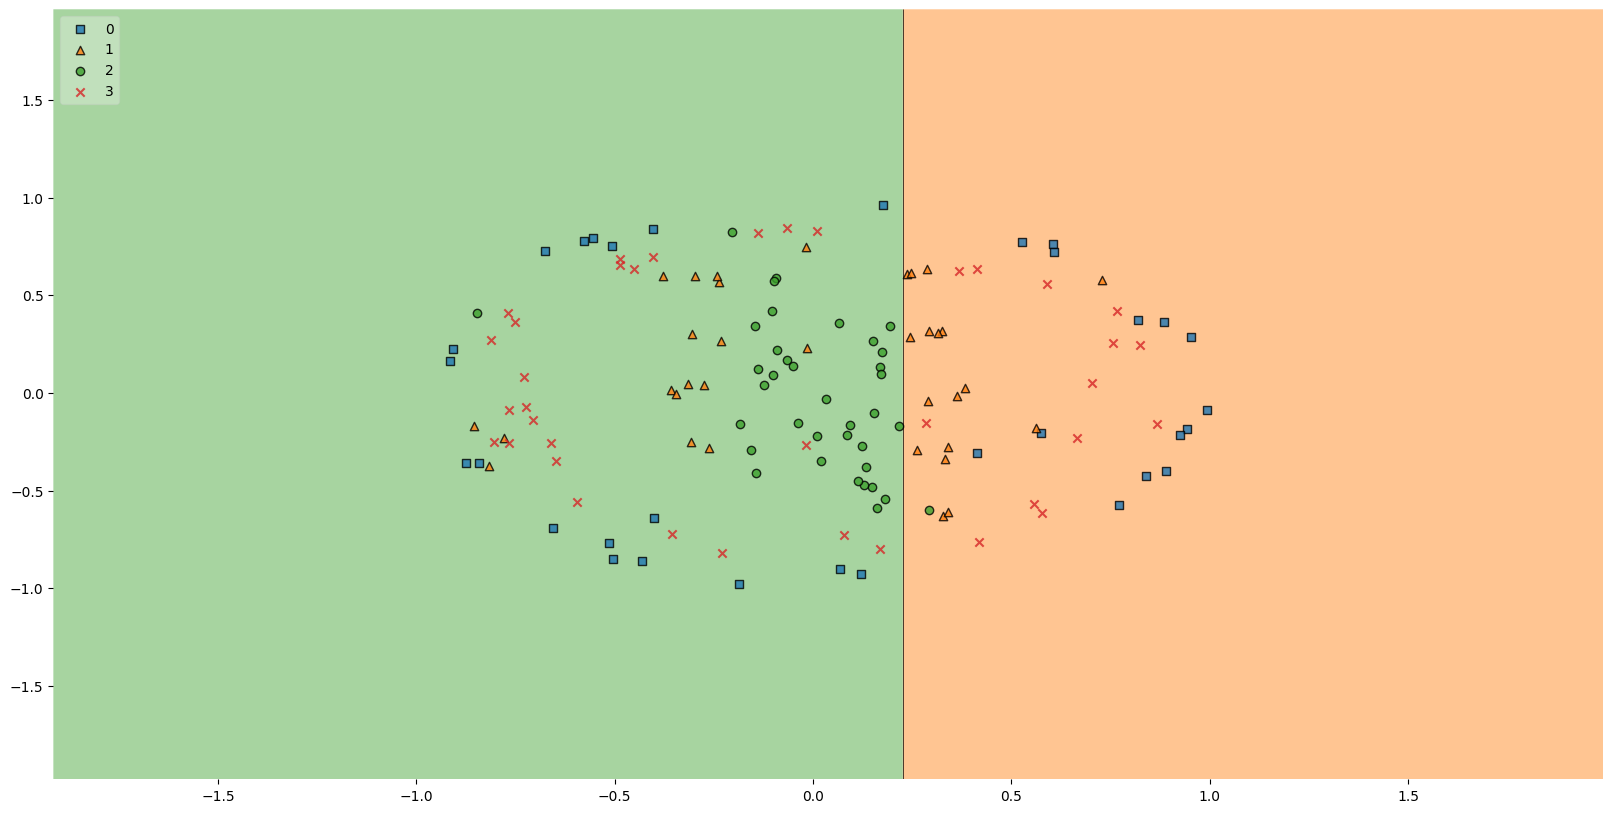

In [43]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(20,10))
plot_decision_regions(X_train[['XCoord', 'YCoord', 'Distance']].to_numpy(), y_train.to_numpy(), dt,
                      filler_feature_values={2: 0.5},
                      filler_feature_ranges={2: 0.5},
                      legend=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


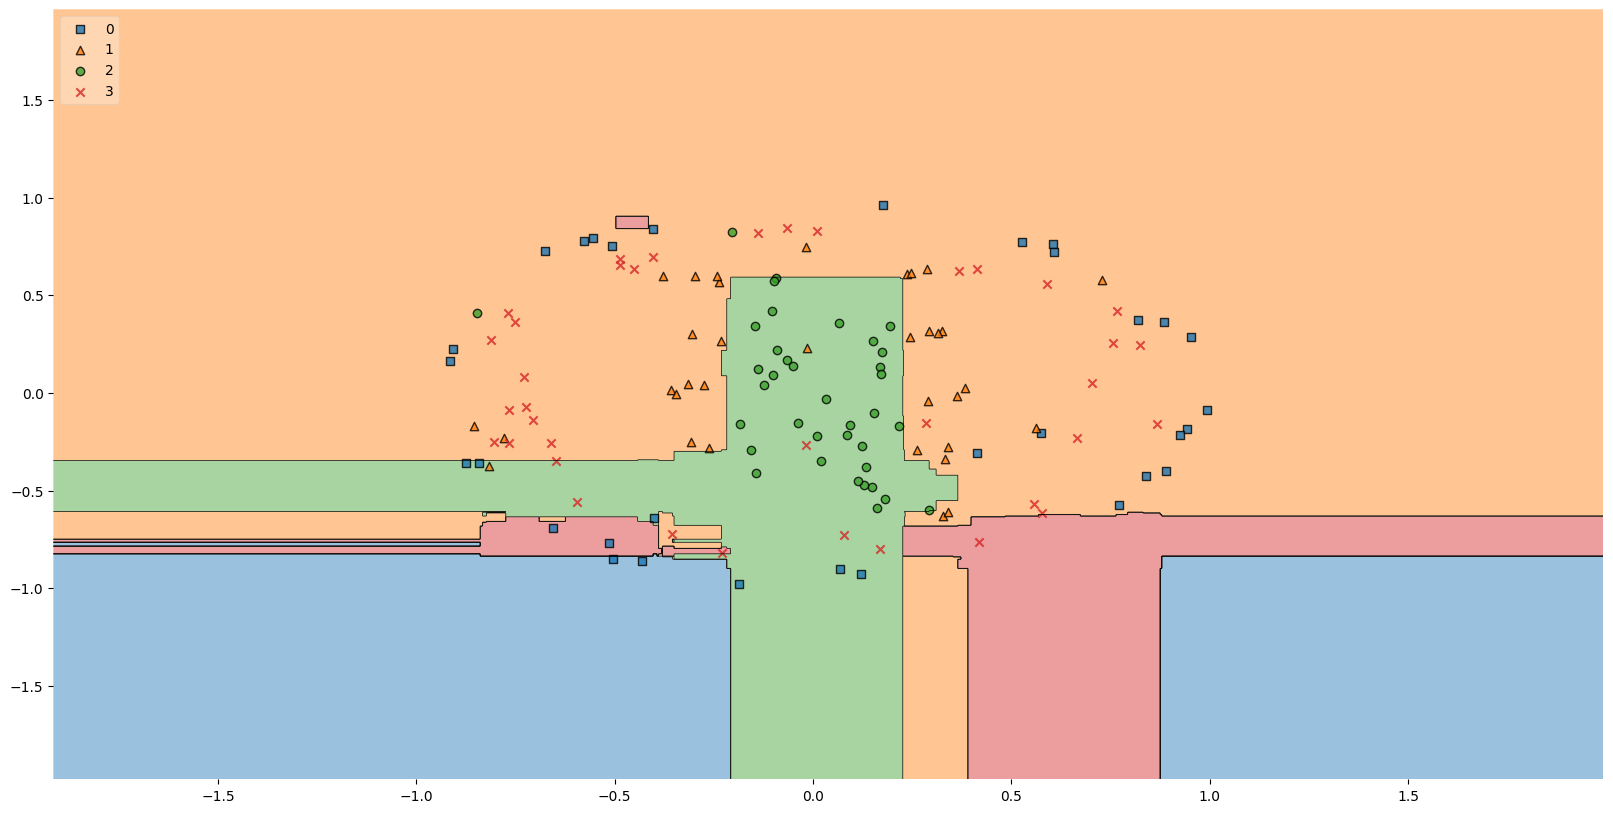

In [44]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(20,10))
plot_decision_regions(X_train[['XCoord', 'YCoord', 'Distance']].to_numpy(), y_train.to_numpy(), rf,
                      filler_feature_values={2: 0.5},
                      filler_feature_ranges={2: 0.5},
                      legend=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


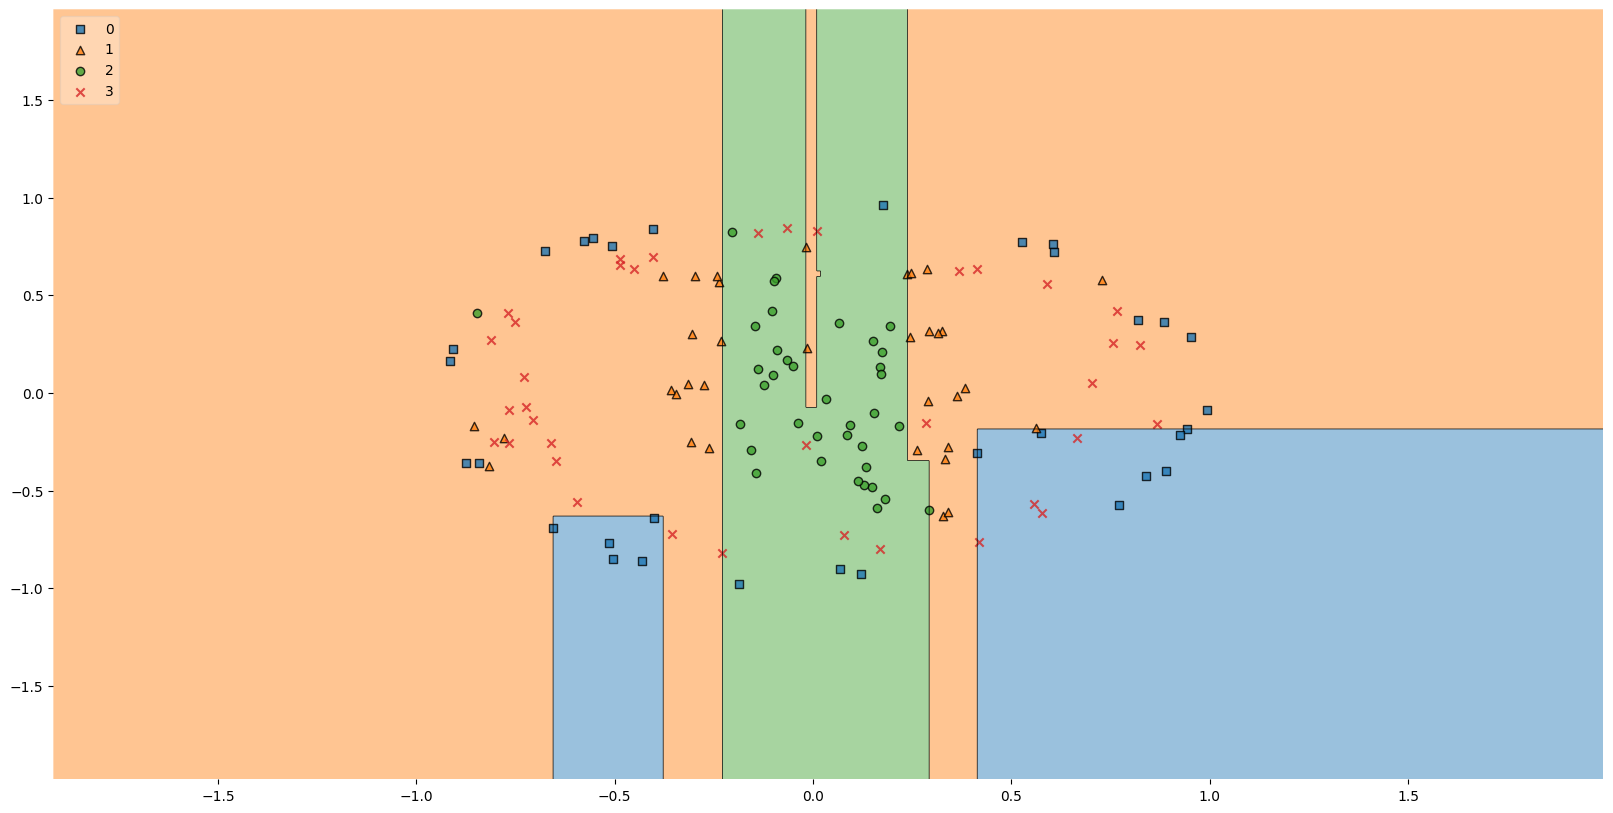

In [45]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(20,10))
plot_decision_regions(X_train[['XCoord', 'YCoord', 'Distance']].to_numpy(), y_train.to_numpy(), xg,
                      filler_feature_values={2: 0.5},
                      filler_feature_ranges={2: 0.5},
                      legend=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


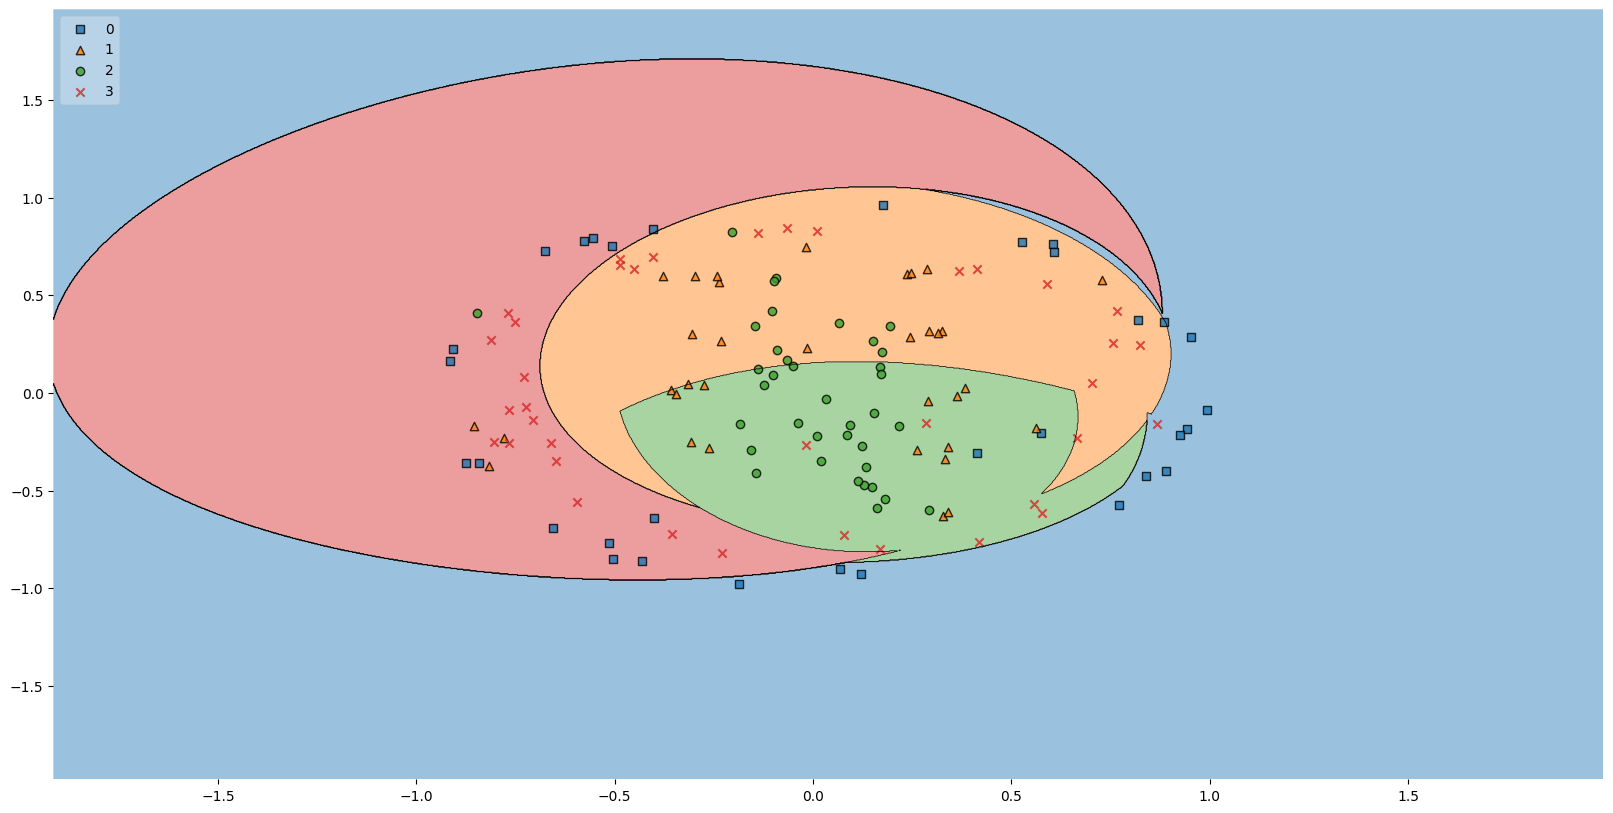

In [46]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(20,10))
plot_decision_regions(X_train[['XCoord', 'YCoord', 'Distance']].to_numpy(), y_train.to_numpy(), svc,
                      filler_feature_values={2: 0.5},
                      filler_feature_ranges={2: 0.5},
                      legend=2)
plt.show()

#### 9.4 Introduction to Cross Validation

There is another method of determining the generalization error of your model and that is through a technique known as cross validation. The fundamental idea behind cross validation is that the data is split into a training portion and a validation test portion. The different cross validation strategies are all variants of this fundamental idea.  

One of the popular forms of cross validation is known as k-fold cross validation. In k-fold cross validation, the testing data is divided into k equal portions. To illustrate this with an image, it will look like this:

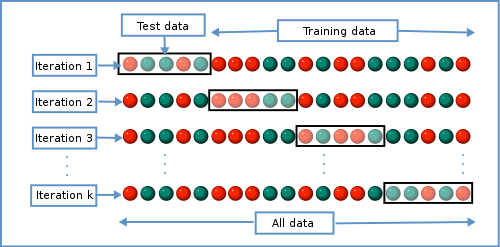

By Gufosowa - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=82298768

This image is an example of 4-fold cross validation. The data is first divided into four portions. One portion will be used as the testing data while the other three will be used as the training data. At every point of time, three portions are being used to train and the resultant model is tested on the final one.

This process is repeated k times. In this case, the process is repeated ? times.

Another variant of the k-fold cross validation is the stratified k-fold cross validation. In the stratified form, instead of dividing the data randomly into k equal parts, they are stratified such that the distribution of classes / values of each fold is approximately equal across all folds.

#### 9.5 Introduction to Hyperparameter Tuning

This is a brute force search to find the best set of parameters for a model. We try to fit various permutations of the parameters to find the best set of parameters which optimize the accuracy.

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
clf_dt = DecisionTreeClassifier(max_depth=3, random_state=5)

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 10, 12],
}

# Instantiate the grid search model
clf_rf_grid = GridSearchCV(estimator = clf_dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
clf_rf_grid.fit(X_train[['XCoord', 'YCoord', 'Distance']], y_train)

y_pred = clf_rf_grid.predict(X_test[['XCoord', 'YCoord', 'Distance']])
accuracy_grid_dt = accuracy_score(y_test, y_pred)
balanced_accuracy_grid_dt = balanced_accuracy_score(y_test, y_pred)

print(accuracy_grid_dt)
print(balanced_accuracy_grid_dt)

Fitting 3 folds for each of 63 candidates, totalling 189 fits
0.851063829787234
0.8618881118881119


In [49]:
clf_rf_grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 12}

Redo the analysis with Random Forest, XGBoost and SVC.

Save the Random Forest accuracies as accuracy_grid_rf and balanced_accuracy_grid_rf.




```
# random forest parameters
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
```

Save the XGBoost accuracies as accuracy_grid_xg and balanced_accuracy_grid_xg.

```
param_grid = {
    'max_depth': [2,3,4,5,6,7,8],
    'n_estimators': [100, 200, 300]
}
```

Save the SVC accuracies as accuracy_grid_svc and balanced_accuracy_grid_svc.



```
param_grid = {
              'C':[1,10,100,1000],
              'gamma':[1,0.1,0.001,0.0001],
              'kernel':['linear','rbf']
            }
```




In [50]:
rf = RandomForestClassifier(random_state=5)
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train[['XCoord', 'YCoord', 'Distance']], y_train)

y_pred = grid_search_rf.predict(X_test[['XCoord', 'YCoord', 'Distance']])

accuracy_grid_rf = accuracy_score(y_test, y_pred)
balanced_accuracy_grid_rf = balanced_accuracy_score(y_test, y_pred)

print(accuracy_grid_rf)
print(balanced_accuracy_grid_rf)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
0.7872340425531915
0.7914335664335664


Print out the best parameters for the rf grid search model.

In [51]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [55]:
xg = XGBClassifier(max_depth=3, n_estimators=100, use_label_encoder=False, random_state=5)
param_grid = {
    'max_depth': [2,3,4,5,6,7,8],
    'n_estimators': [100, 200, 300]
}

grid_search_xg = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search_xg.fit(X_train[['XCoord', 'YCoord', 'Distance']], y_train)

y_pred = grid_search_xg.predict(X_test[['XCoord', 'YCoord', 'Distance']])

accuracy_grid_xg = accuracy_score(y_test, y_pred)
balanced_accuracy_grid_xg = balanced_accuracy_score(y_test, y_pred)

print(accuracy_grid_xg)
print(balanced_accuracy_grid_xg)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
0.8297872340425532
0.8263986013986014


Print out the best parameters for the xgboost grid search model.

In [56]:
grid_search_xg.best_params_

{'max_depth': 6, 'n_estimators': 300}

In [57]:
svc = SVC(gamma='auto', random_state=5)
param_grid = {
    'C':[1,10,100,1000],
    'gamma':[1,0.1,0.001,0.0001],
    'kernel':['linear','rbf']
}

grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search_svc.fit(X_train[['XCoord', 'YCoord', 'Distance']], y_train)

y_pred = grid_search_svc.predict(X_test[['XCoord', 'YCoord', 'Distance']])

accuracy_grid_svc = accuracy_score(y_test, y_pred)
balanced_accuracy_grid_svc = balanced_accuracy_score(y_test, y_pred)

print(accuracy_grid_svc)
print(balanced_accuracy_grid_svc)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
0.6595744680851063
0.6620629370629371


Print out the best parameters for the svc grid search model.

In [58]:
grid_search_svc.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [59]:
header_list = []
header_list.append(" ")
header_list.append("Decision Tree")
header_list.append("Random Forest")
header_list.append("XG Boost")
header_list.append("SVC")

accuracy_baseline_list = []
accuracy_baseline_list.append("accuracy baseline")
accuracy_baseline_list.append(accuracy_baseline_dt)
accuracy_baseline_list.append(accuracy_baseline_rf)
accuracy_baseline_list.append(accuracy_baseline_xg)
accuracy_baseline_list.append(accuracy_baseline_svc)

balanced_accuracy_baseline_list = []
balanced_accuracy_baseline_list.append("balanced accuracy baseline")
balanced_accuracy_baseline_list.append(balanced_accuracy_baseline_dt)
balanced_accuracy_baseline_list.append(balanced_accuracy_baseline_rf)
balanced_accuracy_baseline_list.append(balanced_accuracy_baseline_xg)
balanced_accuracy_baseline_list.append(balanced_accuracy_baseline_svc)

accuracy_list = []
accuracy_list.append("accuracy")
accuracy_list.append(accuracy_dt)
accuracy_list.append(accuracy_rf)
accuracy_list.append(accuracy_xg)
accuracy_list.append(accuracy_svc)

balanced_accuracy_list = []
balanced_accuracy_list.append("balanced accuracy")
balanced_accuracy_list.append(balanced_accuracy_dt)
balanced_accuracy_list.append(balanced_accuracy_rf)
balanced_accuracy_list.append(balanced_accuracy_xg)
balanced_accuracy_list.append(balanced_accuracy_svc)

accuracy_grid_list = []
accuracy_grid_list.append("accuracy grid")
accuracy_grid_list.append(accuracy_grid_dt)
accuracy_grid_list.append(accuracy_grid_rf)
accuracy_grid_list.append(accuracy_grid_xg)
accuracy_grid_list.append(accuracy_grid_svc)

balanced_accuracy_grid_list = []
balanced_accuracy_grid_list.append("balanced accuracy grid")
balanced_accuracy_grid_list.append(balanced_accuracy_grid_dt)
balanced_accuracy_grid_list.append(balanced_accuracy_grid_rf)
balanced_accuracy_grid_list.append(balanced_accuracy_grid_xg)
balanced_accuracy_grid_list.append(balanced_accuracy_grid_svc)


full_list = []
full_list.append(header_list)
full_list.append(accuracy_grid_list)
full_list.append(balanced_accuracy_grid_list)
full_list.append(balanced_accuracy_list)
full_list.append(balanced_accuracy_baseline_list)
full_list.append(accuracy_list)
full_list.append(accuracy_baseline_list)

df = pd.DataFrame(full_list)
df

,0,1,2,3,4
0,,Decision Tree,Random Forest,XG Boost,SVC
1,accuracy grid,0.851064,0.787234,0.829787,0.659574
2,balanced accuracy grid,0.861888,0.791434,0.826399,0.662063
3,balanced accuracy,0.712762,0.768706,0.829895,0.364685
4,balanced accuracy baseline,0.43007,0.586713,0.654021,0.326224
5,accuracy,0.723404,0.765957,0.829787,0.382979
6,accuracy baseline,0.468085,0.617021,0.659574,0.340426
